In [1]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [2]:
#https://drive.google.com/file/d/15vtzJuiI-3POTLUYp87-ZKUESFJApglc/view?usp=sharing
#https://drive.google.com/file/d/1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4/view?usp=sharing  
#https://drive.google.com/file/d/1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh/view?usp=sharing   Corregido
!gdown --id "1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4"
!gdown --id "1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh"
#https://drive.google.com/file/d/1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu/view?usp=sharing
#https://drive.google.com/file/d/1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6/view?usp=sharing
#https://drive.google.com/file/d/1Q694dPk7a7BjIAJjP3g_G9H0RTDuB_xl/view?usp=sharing
!gdown --id "1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu"
!gdown --id "1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6"
!gdown --id "1Q694dPk7a7BjIAJjP3g_G9H0RTDuB_xl"

Downloading...
From: https://drive.google.com/uc?id=1R_mIMy-Yyvkok3XzsLRkEBcRjsTD-On4
To: /content/Motor_Monofasico_2_2.csv
100% 116k/116k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m3X_hg0aZVVJF_BnqXKIY96d-3qyNBRh
To: /content/Motor_Monofasico_2_2_rms.csv
100% 107k/107k [00:00<00:00, 31.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cfpRsiMjECwbrSdvcOQd-25T5NCPpgcu
To: /content/Motor_trifasico_Para_entrenamiento.csv
100% 118k/118k [00:00<00:00, 43.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dRa9wYTOy8SfynivnVpLIR5_Tx3Z4oa6
To: /content/Motor_trifasico_Para_Prediccion.csv
100% 15.3k/15.3k [00:00<00:00, 22.5MB/s]


In [2]:
def graficar_resultado(Valor_real, Valor_prediccion):
    plt.figure(figsize=(32,15))
    plt.plot(Valor_real[0:len(Valor_prediccion)],color='red', label='Dato Real del sensor')
    plt.plot(Valor_prediccion, color='blue', label='Dato predicho')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor V en m/s2')
    plt.legend()
    plt.show()

In [3]:
class grafica:
    Valor_real=0
    Valor_prediccion=0
    
    def comparar(self, Valor_real, Valor_prediccion):
        plt.figure(figsize=(32,15))
        plt.plot(Valor_real[0:len(Valor_prediccion)],color='red', label='Dato Real del sensor')
        plt.plot(Valor_prediccion, color='blue', label='Dato predicho')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor V en m/s2')
        plt.legend()
        plt.show()
    
    def mostrar(self, Valor_prediccion):
        plt.figure(figsize=(32,15))        
        plt.plot(Valor_prediccion, color='blue', label='Dato predicho')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor V en m/s2')
        plt.legend()
        plt.show()
    

In [4]:
#
# Lectura de los datos
#
dataset = pd.read_csv('datos_prueba_3_3000_reg.csv', index_col='Datos_fch_hr', parse_dates=['Datos_fch_hr'])
dataset.head()


,Datos_eje_x,Datos_eje_y,Datos_eje_z,Datos_tmp_s,Datos_tmp_loc
Datos_fch_hr,,,,,
2021-10-26 01:43:51,0.05,0.47,-9.35,0,\N
2021-10-26 01:43:52,0.11,0.71,-10.01,0,\N
2021-10-26 01:43:53,0.03,0.09,-10.25,0,\N
2021-10-26 01:43:54,-0.04,0.19,-10.33,0,\N
2021-10-26 01:43:55,0.00,0.36,-10.09,0,\N


2/2 [==============================] - 0s 32ms/step


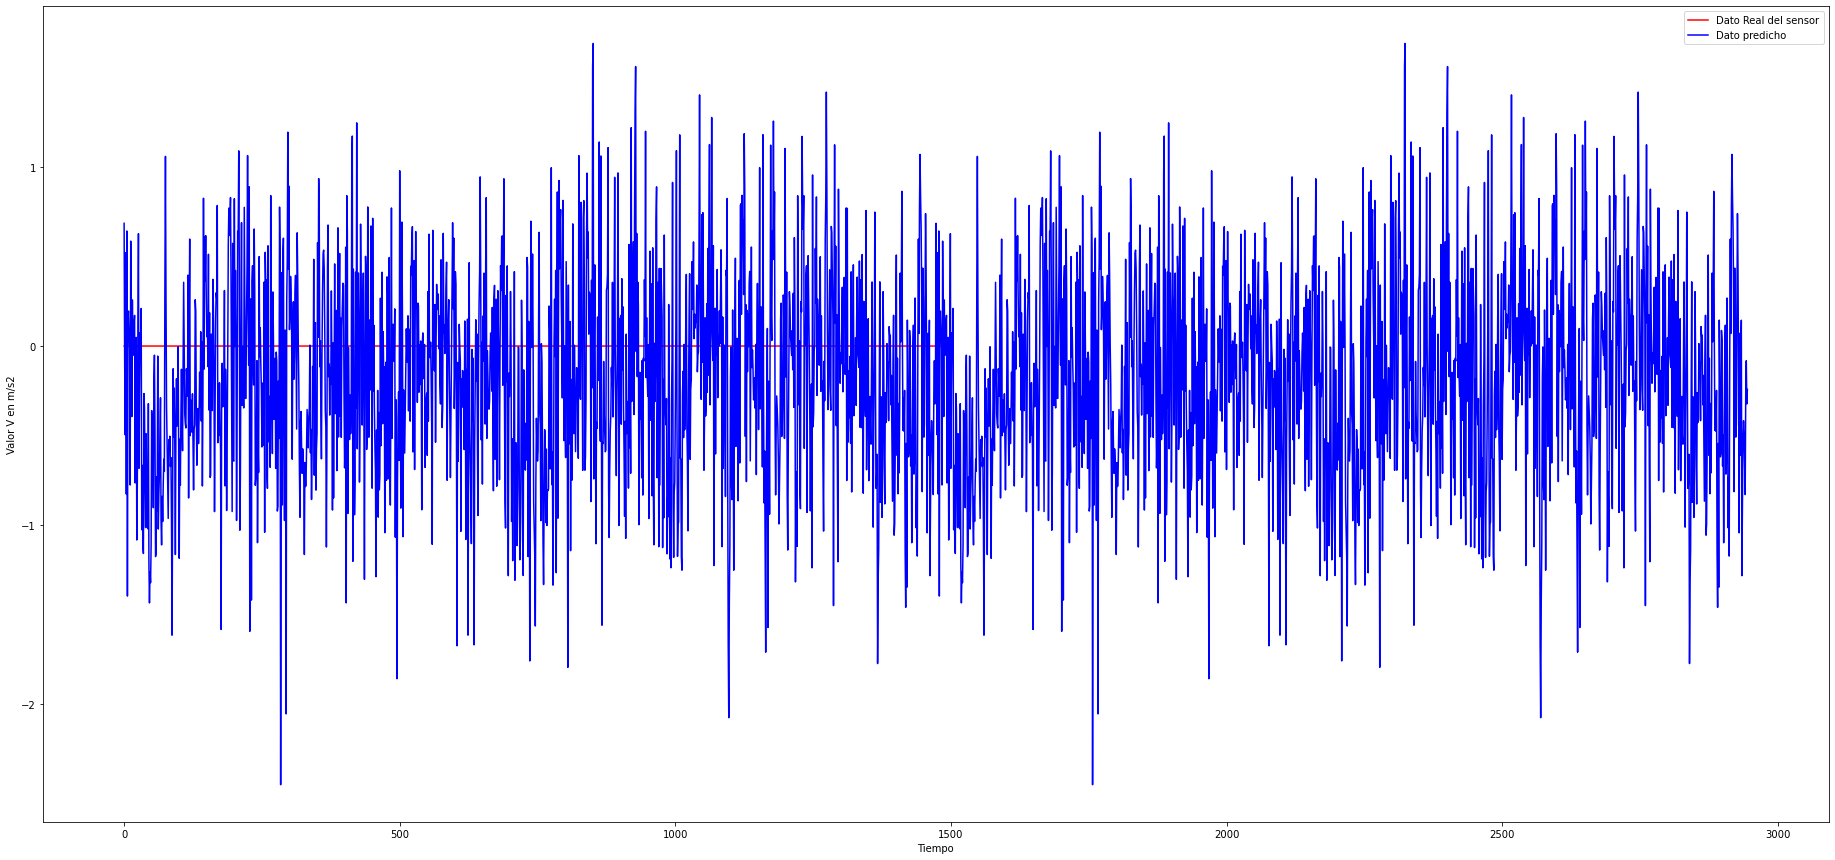

In [29]:
#
# Lectura extendida de valores  - 1500 para el test 3 
# Ejecutar despues de hacer el entrenamiento
#
prediccion_larga = pd.read_csv('Prediccion_Larga_Total_.csv', index_col='Datos_fch_hr', parse_dates=['Datos_fch_hr'])
prediccion_larga.head()

validacion_final = prediccion_larga['26-10-2021 00:00:01':].iloc[:,1:2]
prueba = validacion_final.values
sc = MinMaxScaler(feature_range=(-1,1))
set_entrenamiento_sensor_escalado = sc.fit_transform(set_entrenamiento_sensor)

X_test = []
for i in range(time_step,len(prueba)):
    X_test.append(prueba[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion_extendida = modelo.predict(X_test,steps=2,verbose=1,workers=12)
prediccion_extendida = sc.inverse_transform(prediccion_extendida)
result = np.clip(validacion_final.values, -0.00001, 0.000001)
# Graficar resultados
graficar_resultado(result,prediccion_extendida)

#Sacar informacion de los graficos , Vs los resultados
np.savetxt("Datos_predichos_extendido.txt", prediccion_extendida,fmt="%.5f", delimiter=",", newline="\n")





In [19]:
print(X_test[0])

[[-0.6 ]
 [ 0.6 ]
 [-0.04]
 [-0.01]
 [ 0.49]
 [-0.45]
 [ 0.56]
 [ 0.16]
 [ 0.34]
 [-0.72]
 [-0.5 ]
 [ 0.91]
 [-0.19]
 [ 0.36]
 [-0.44]
 [ 0.72]
 [-0.26]
 [ 0.02]
 [ 0.42]
 [-0.27]
 [-0.43]
 [ 0.17]
 [-0.07]
 [ 0.56]
 [-0.32]
 [ 0.28]
 [-0.52]
 [-0.11]
 [ 0.61]
 [-0.4 ]]


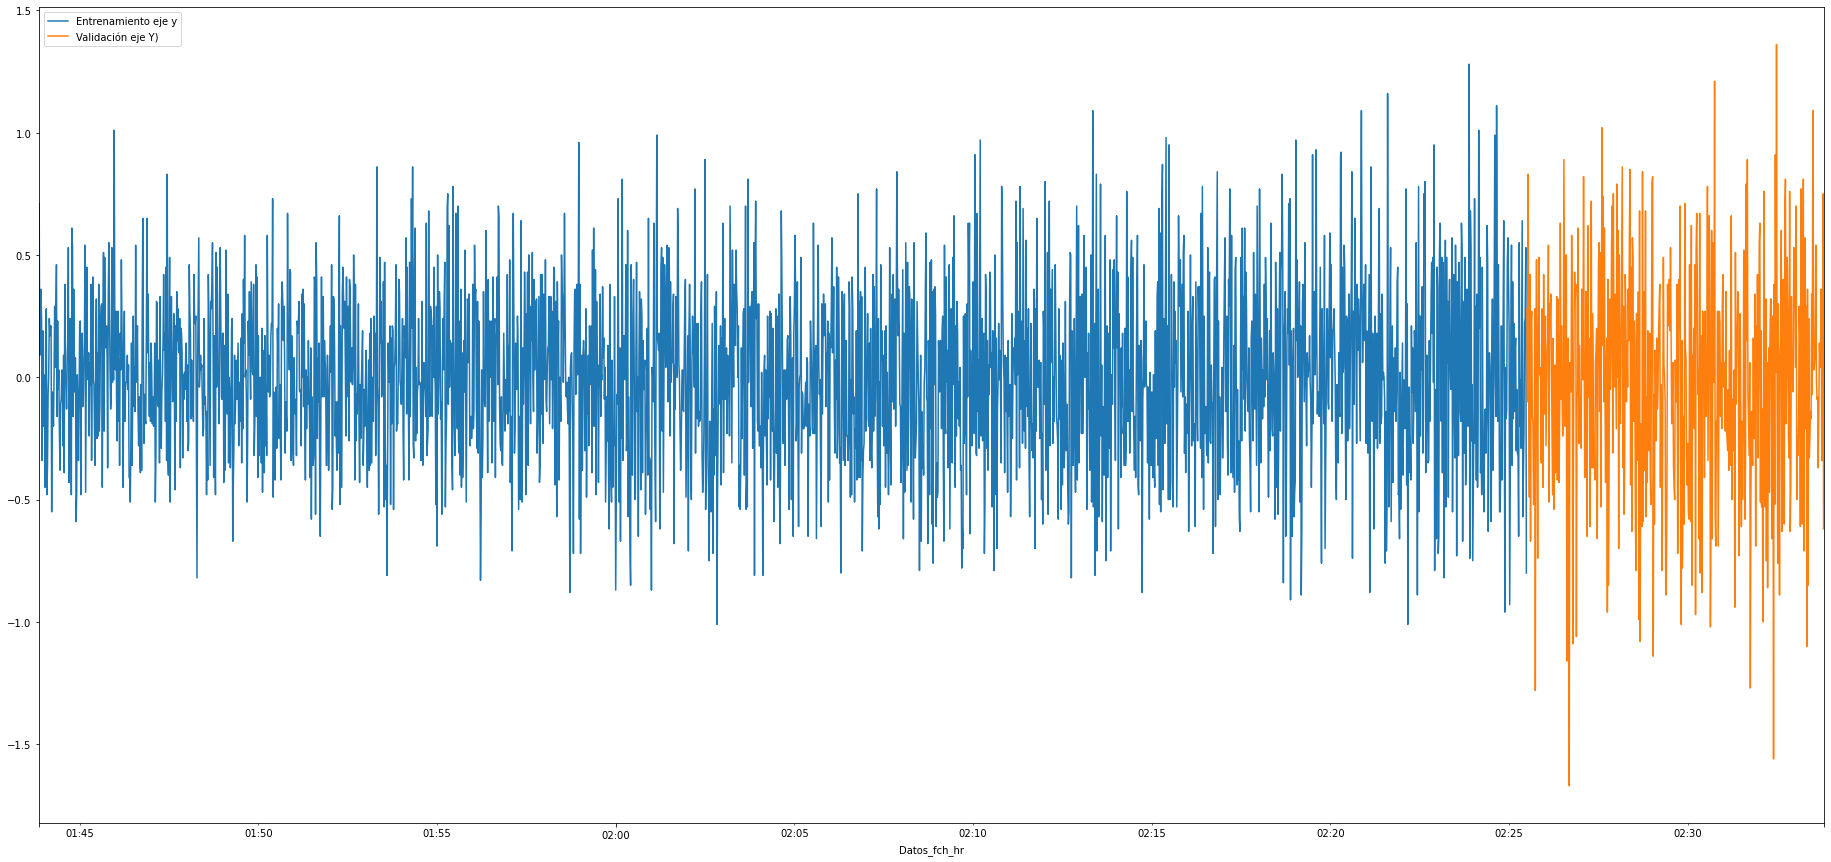

In [5]:


#
# DAtos de validacion y entrenamiento
# La LSTM se entrenaria con los datos provenientes de la base de datos 
# Es un entrenamiento / dataset, para cada sensor
#
set_entrenamiento_sensor = dataset[:'26-10-2021 2:25:29'].iloc[:,1:2]
set_validacion_sensor = dataset['26-10-2021 2:25:30':].iloc[:,1:2]
plt.figure(figsize=(32,15))
set_entrenamiento_sensor['Datos_eje_y'].plot(legend=True)
set_validacion_sensor['Datos_eje_y'].plot(legend=True)

plt.legend(['Entrenamiento eje y', 'Validación eje Y)'])
plt.show()

# Se normalizan los datos para la lstm
sc = MinMaxScaler(feature_range=(-1,1))
set_entrenamiento_sensor_escalado = sc.fit_transform(set_entrenamiento_sensor)

In [6]:
set_validacion_sensor.head()

,Datos_eje_y
Datos_fch_hr,
2021-10-26 02:25:30,0.28
2021-10-26 02:25:31,-0.10
2021-10-26 02:25:32,0.83
2021-10-26 02:25:33,-0.03
2021-10-26 02:25:34,-0.49


In [7]:

# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step = 30
X_train = []
Y_train = []
m = len(set_entrenamiento_sensor_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_sensor_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_sensor_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:

#
# Red LSTM
#
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 32
inicio = int(round(time.time() * 1000))

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
#modelo.compile(optimizer='rmsprop', loss='mse')
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=800,batch_size=16)

fin = int(round(time.time() * 1000))
print(inicio,fin)

Epoch 1/800
2469/2469 [==============================] - 1s 514us/step - loss: 0.0949
Epoch 2/800
2469/2469 [==============================] - 1s 366us/step - loss: 0.0943
Epoch 3/800
2469/2469 [==============================] - 1s 368us/step - loss: 0.0940
Epoch 4/800
2469/2469 [==============================] - 1s 387us/step - loss: 0.0940
Epoch 5/800
2469/2469 [==============================] - 1s 413us/step - loss: 0.0939
Epoch 6/800
2469/2469 [==============================] - 1s 396us/step - loss: 0.0939
Epoch 7/800
2469/2469 [==============================] - 1s 367us/step - loss: 0.0939
Epoch 8/800
2469/2469 [==============================] - 1s 388us/step - loss: 0.0939
Epoch 9/800
2469/2469 [==============================] - 1s 380us/step - loss: 0.0938
Epoch 10/800
2469/2469 [==============================] - 1s 367us/step - loss: 0.0937
Epoch 11/800
2469/2469 [==============================] - 1s 359us/step - loss: 0.0936
Epoch 12/800
2469/2469 [============================

2469/2469 [==============================] - 1s 408us/step - loss: 0.0761
Epoch 189/800
2469/2469 [==============================] - 1s 390us/step - loss: 0.0766
Epoch 190/800
2469/2469 [==============================] - 1s 405us/step - loss: 0.0759
Epoch 191/800
2469/2469 [==============================] - 1s 399us/step - loss: 0.0758
Epoch 192/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0756
Epoch 193/800
2469/2469 [==============================] - 1s 364us/step - loss: 0.0751
Epoch 194/800
2469/2469 [==============================] - 1s 368us/step - loss: 0.0746
Epoch 195/800
2469/2469 [==============================] - 1s 373us/step - loss: 0.0744
Epoch 196/800
2469/2469 [==============================] - 1s 372us/step - loss: 0.0750
Epoch 197/800
2469/2469 [==============================] - 1s 374us/step - loss: 0.0743
Epoch 198/800
2469/2469 [==============================] - 1s 370us/step - loss: 0.0741
Epoch 199/800
2469/2469 [=====================

Epoch 281/800
2469/2469 [==============================] - 1s 395us/step - loss: 0.0591
Epoch 282/800
2469/2469 [==============================] - 1s 389us/step - loss: 0.0596
Epoch 283/800
2469/2469 [==============================] - 1s 390us/step - loss: 0.0587
Epoch 284/800
2469/2469 [==============================] - 1s 469us/step - loss: 0.0587
Epoch 285/800
2469/2469 [==============================] - 1s 439us/step - loss: 0.0582
Epoch 286/800
2469/2469 [==============================] - 1s 530us/step - loss: 0.0581
Epoch 287/800
2469/2469 [==============================] - 1s 516us/step - loss: 0.0588
Epoch 288/800
2469/2469 [==============================] - 1s 569us/step - loss: 0.0577
Epoch 289/800
2469/2469 [==============================] - 2s 621us/step - loss: 0.0582 0s -
Epoch 290/800
2469/2469 [==============================] - 1s 598us/step - loss: 0.0584
Epoch 291/800
2469/2469 [==============================] - 2s 707us/step - loss: 0.0572
Epoch 292/800
2469/2469 [==

2469/2469 [==============================] - 1s 414us/step - loss: 0.0415
Epoch 375/800
2469/2469 [==============================] - 1s 400us/step - loss: 0.0406
Epoch 376/800
2469/2469 [==============================] - 1s 420us/step - loss: 0.0407
Epoch 377/800
2469/2469 [==============================] - 1s 536us/step - loss: 0.0408
Epoch 378/800
2469/2469 [==============================] - 1s 475us/step - loss: 0.0402
Epoch 379/800
2469/2469 [==============================] - 1s 426us/step - loss: 0.0407
Epoch 380/800
2469/2469 [==============================] - 1s 392us/step - loss: 0.0397
Epoch 381/800
2469/2469 [==============================] - 1s 392us/step - loss: 0.0396
Epoch 382/800
2469/2469 [==============================] - 1s 406us/step - loss: 0.0407
Epoch 383/800
2469/2469 [==============================] - 1s 390us/step - loss: 0.0393
Epoch 384/800
2469/2469 [==============================] - 1s 391us/step - loss: 0.0396
Epoch 385/800
2469/2469 [=====================

2469/2469 [==============================] - 1s 449us/step - loss: 0.0180
Epoch 561/800
2469/2469 [==============================] - 1s 446us/step - loss: 0.0194
Epoch 562/800
2469/2469 [==============================] - ETA: 0s - loss: 0.018 - 1s 472us/step - loss: 0.0188
Epoch 563/800
2469/2469 [==============================] - 1s 449us/step - loss: 0.0176
Epoch 564/800
2469/2469 [==============================] - 1s 448us/step - loss: 0.0186
Epoch 565/800
2469/2469 [==============================] - 1s 464us/step - loss: 0.0184
Epoch 566/800
2469/2469 [==============================] - 1s 440us/step - loss: 0.0175
Epoch 567/800
2469/2469 [==============================] - 1s 450us/step - loss: 0.0182
Epoch 568/800
2469/2469 [==============================] - 1s 431us/step - loss: 0.0182
Epoch 569/800
2469/2469 [==============================] - 1s 429us/step - loss: 0.0180
Epoch 570/800
2469/2469 [==============================] - 1s 423us/step - loss: 0.0176
Epoch 571/800
2469/246

2469/2469 [==============================] - 1s 536us/step - loss: 0.0092
Epoch 746/800
2469/2469 [==============================] - 1s 528us/step - loss: 0.0092
Epoch 747/800
2469/2469 [==============================] - 1s 462us/step - loss: 0.0097
Epoch 748/800
2469/2469 [==============================] - 1s 484us/step - loss: 0.0095
Epoch 749/800
2469/2469 [==============================] - 1s 458us/step - loss: 0.0094
Epoch 750/800
2469/2469 [==============================] - 1s 426us/step - loss: 0.0091
Epoch 751/800
2469/2469 [==============================] - 1s 425us/step - loss: 0.0091
Epoch 752/800
2469/2469 [==============================] - 1s 399us/step - loss: 0.0090
Epoch 753/800
2469/2469 [==============================] - 1s 398us/step - loss: 0.0091
Epoch 754/800
2469/2469 [==============================] - 1s 422us/step - loss: 0.0090
Epoch 755/800
2469/2469 [==============================] - 1s 422us/step - loss: 0.0091
Epoch 756/800
2469/2469 [=====================

In [38]:
#
# Salvar el modelo
#

modelo.summary()
modelo.save('modelo11.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [8]:
#
# Cargar nuevamente el modelo
#
nuevo_modelo = keras.models.load_model("modelo11.h5")

[[ 0.12663755]
 [-0.20524017]
 [ 0.6069869 ]
 [-0.1441048 ]
 [-0.54585153]
 [ 0.2489083 ]
 [-0.70305677]
 [ 0.07423581]
 [ 0.11790393]
 [-0.25764192]
 [-0.28384279]
 [-0.5720524 ]
 [-0.5371179 ]
 [ 0.12663755]
 [-1.23580786]
 [-0.10043668]
 [ 0.30131004]
 [-0.1790393 ]
 [-0.76419214]
 [ 0.03930131]
 [ 0.31004367]
 [-0.10917031]
 [-0.08296943]
 [-0.12663755]
 [-0.42358079]
 [ 0.12663755]
 [ 0.11790393]
 [-0.51091703]
 [ 0.2489083 ]
 [-0.2489083 ]
 [-0.24017467]
 [ 0.10043668]
 [-0.36244541]
 [-0.19650655]
 [-0.02183406]
 [ 0.03056769]
 [ 0.35371179]
 [-0.56331878]
 [ 0.1441048 ]
 [ 0.08296943]
 [ 0.1790393 ]
 [-0.04803493]
 [-0.24017467]
 [-0.5371179 ]
 [ 0.02183406]
 [-0.58951965]
 [-0.18777293]
 [-0.07423581]
 [-0.45851528]
 [-0.35371179]
 [ 0.17030568]
 [-0.48471616]
 [ 0.16157205]
 [-0.02183406]
 [-0.49344978]
 [-0.20524017]
 [ 0.43231441]
 [-0.19650655]
 [ 0.06550218]
 [-0.18777293]
 [-0.32751092]
 [-0.19650655]
 [ 0.65938865]
 [ 0.2139738 ]
 [-0.29257642]
 [ 0.09170306]
 [ 0.31877

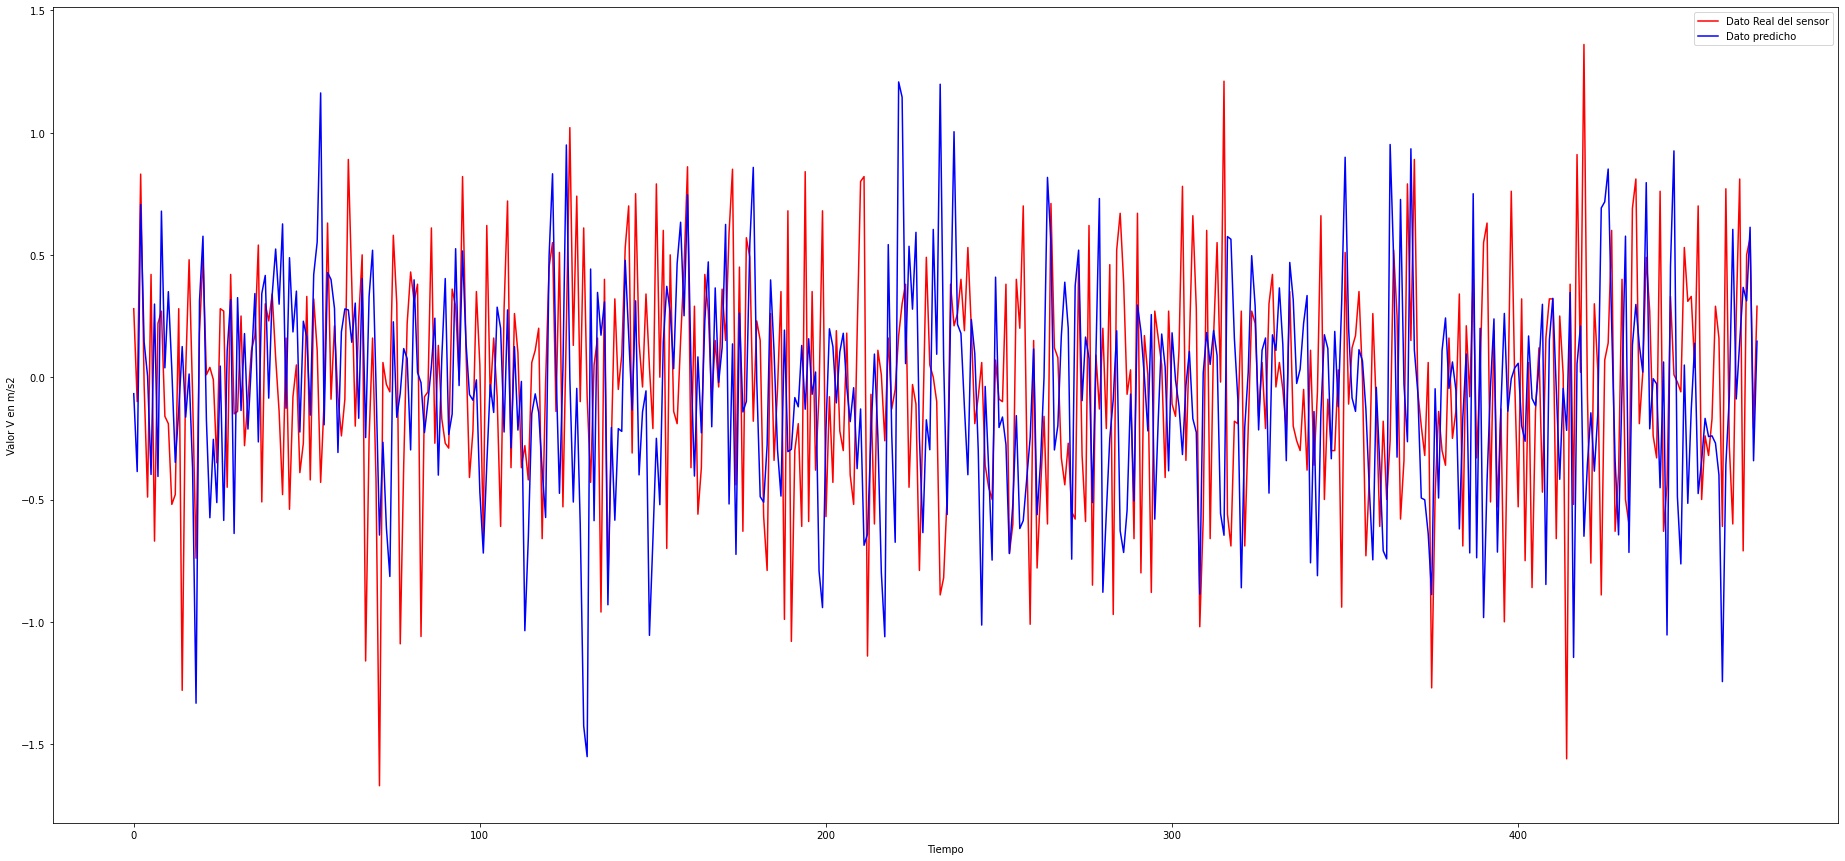

In [87]:

#
# Predicciones 
#
x_test = set_validacion_sensor.values
x_test = sc.transform(x_test)
print(x_test)
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = nuevo_modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

# Graficar resultados
graficar_resultado(set_validacion_sensor.values,prediccion)

In [11]:
gra = grafica()


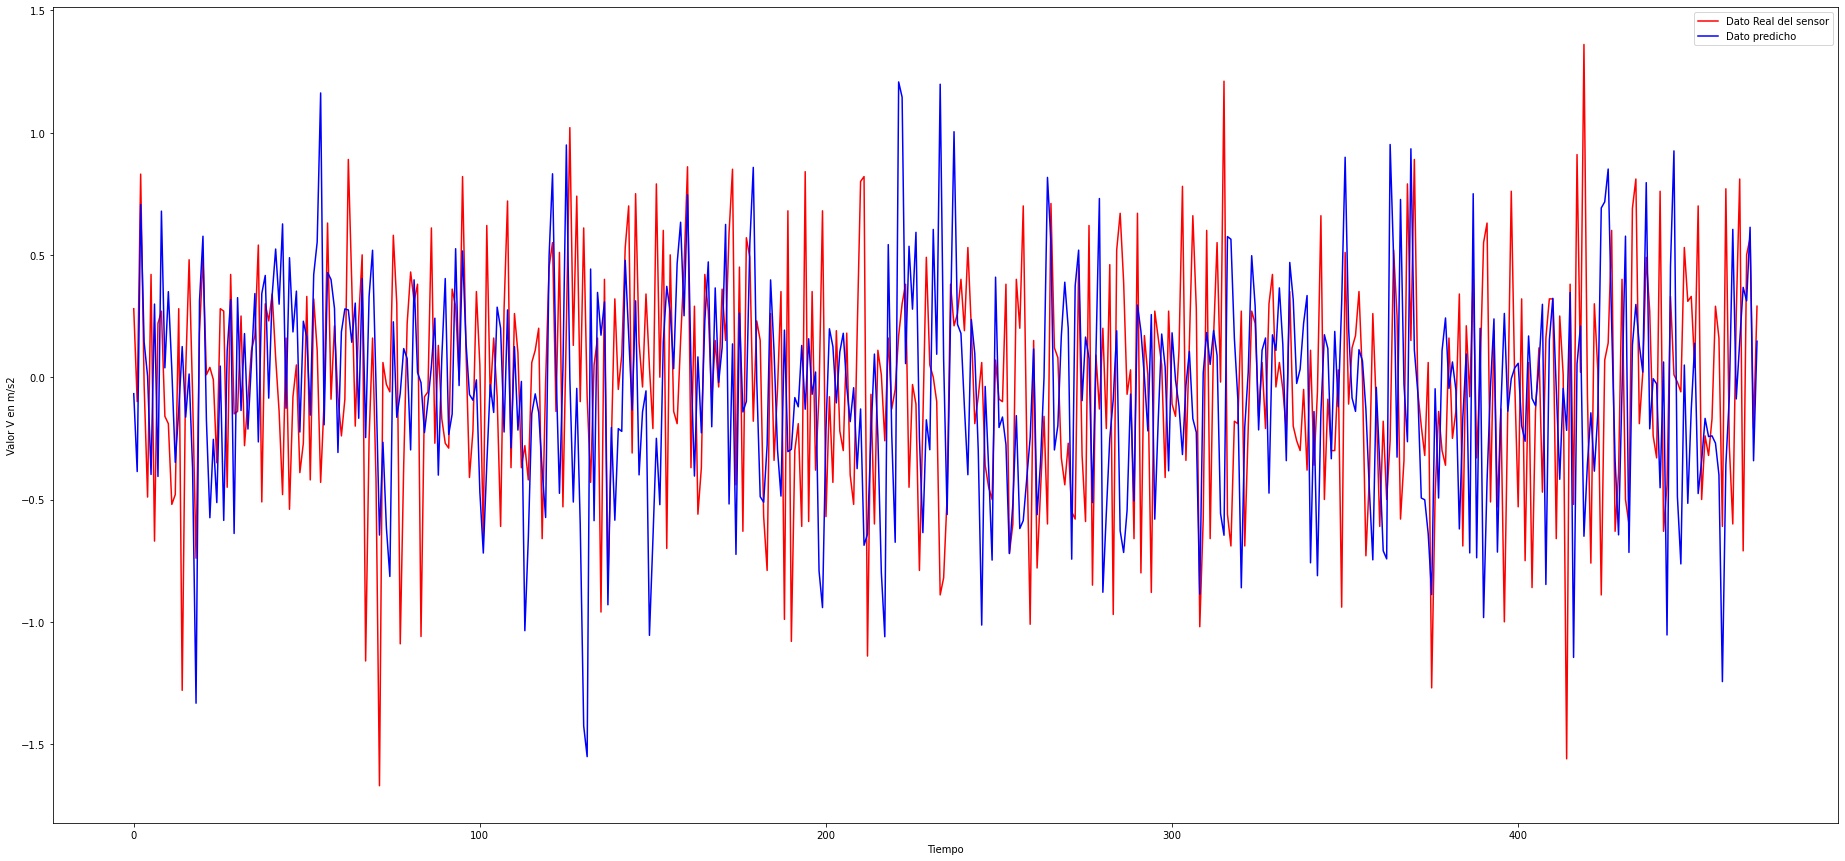

In [15]:
from keras.utils import plot_model
gra.comparar(set_validacion_sensor.values,prediccion)


In [38]:
#Sacar informacion de los graficos , Vs los resultados
np.savetxt("Datos_reales_exp_2_2.txt", set_validacion_sensor.values,fmt="%.5f", delimiter=",", newline="\n")
np.savetxt("Datos_predichos_exp_2_4.txt", prediccion,fmt="%.5f", delimiter=",", newline="\n")

[[ 0.12663755]
 [-0.20524017]
 [ 0.6069869 ]
 [-0.1441048 ]
 [-0.54585153]
 [ 0.2489083 ]
 [-0.70305677]
 [ 0.07423581]
 [ 0.11790393]
 [-0.25764192]
 [-0.28384279]
 [-0.5720524 ]
 [-0.5371179 ]
 [ 0.12663755]
 [-1.23580786]
 [-0.10043668]
 [ 0.30131004]
 [-0.1790393 ]
 [-0.76419214]
 [ 0.03930131]
 [ 0.31004367]
 [-0.10917031]
 [-0.08296943]
 [-0.12663755]
 [-0.42358079]
 [ 0.12663755]
 [ 0.11790393]
 [-0.51091703]
 [ 0.2489083 ]
 [-0.2489083 ]
 [-0.24017467]
 [ 0.10043668]
 [-0.36244541]
 [-0.19650655]
 [-0.02183406]
 [ 0.03056769]
 [ 0.35371179]
 [-0.56331878]
 [ 0.1441048 ]
 [ 0.08296943]
 [ 0.1790393 ]
 [-0.04803493]
 [-0.24017467]
 [-0.5371179 ]
 [ 0.02183406]
 [-0.58951965]
 [-0.18777293]
 [-0.07423581]
 [-0.45851528]
 [-0.35371179]
 [ 0.17030568]
 [-0.48471616]
 [ 0.16157205]
 [-0.02183406]
 [-0.49344978]
 [-0.20524017]
 [ 0.43231441]
 [-0.19650655]
 [ 0.06550218]
 [-0.18777293]
 [-0.32751092]
 [-0.19650655]
 [ 0.65938865]
 [ 0.2139738 ]
 [-0.29257642]
 [ 0.09170306]
 [ 0.31877

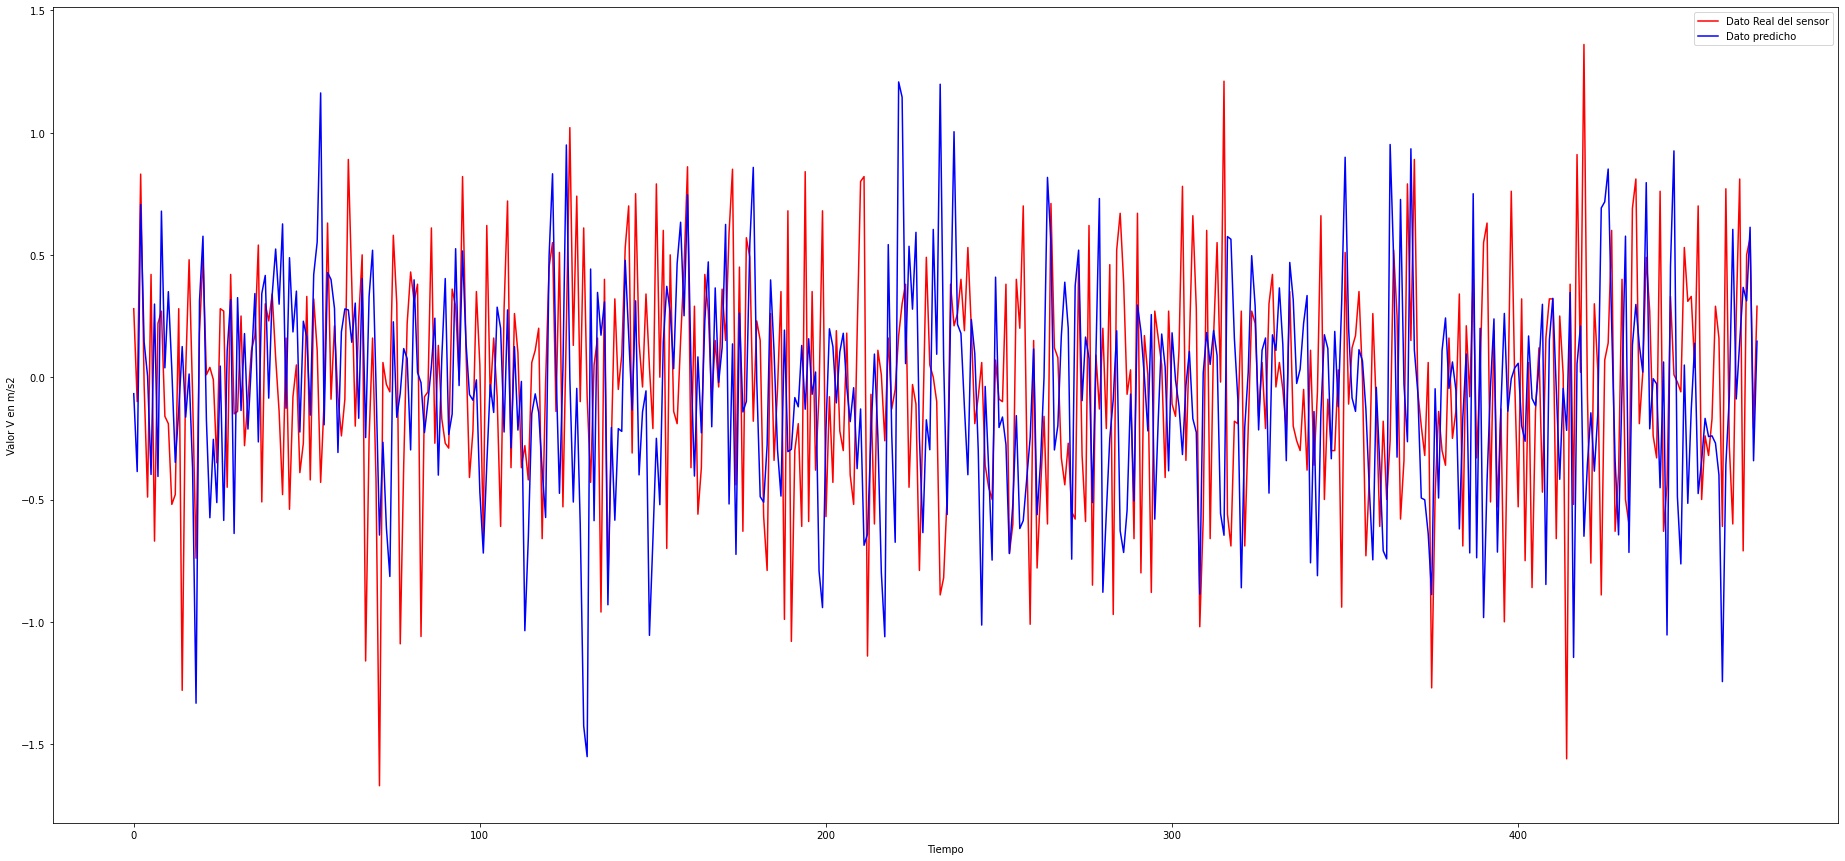

In [88]:
#
# Predicciones 
#
x_test = set_validacion_sensor.values
x_test = sc.transform(x_test)
print(x_test)
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
    print(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = nuevo_modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

# Graficar resultados
graficar_resultado(set_validacion_sensor.values,prediccion)

[[ 0.12700227]
 [-0.3857539 ]
 [ 0.7056094 ]
 [ 0.14348592]
 [ 0.00464162]
 [-0.39780095]
 [ 0.29879007]
 [-0.40589747]
 [ 0.6786998 ]
 [ 0.0381844 ]
 [ 0.34958103]
 [ 0.03185255]
 [-0.34837297]
 [-0.13591543]
 [ 0.1251172 ]
 [-0.16338989]
 [ 0.0130296 ]
 [-0.37206545]
 [-1.3326269 ]
 [ 0.3121347 ]
 [ 0.57614654]
 [-0.1766985 ]
 [-0.5744998 ]
 [-0.2539766 ]
 [-0.51265883]
 [ 0.04540733]
 [-0.58548325]
 [ 0.10857886]
 [ 0.31697494]
 [-0.63881665]
 [ 0.32497475]
 [-0.13627428]
 [ 0.17823595]
 [-0.21192773]
 [ 0.05607846]
 [ 0.34172496]
 [-0.2646684 ]
 [ 0.3420791 ]
 [ 0.41578335]
 [-0.0856675 ]
 [ 0.33712694]
 [ 0.52380526]
 [ 0.29847723]
 [ 0.6264177 ]
 [-0.127061  ]
 [ 0.48832816]
 [ 0.1849588 ]
 [ 0.35182172]
 [-0.22413278]
 [ 0.22880208]
 [ 0.16191219]
 [-0.15513326]
 [ 0.41982672]
 [ 0.55215204]
 [ 1.1617264 ]
 [-0.19474421]
 [ 0.4277979 ]
 [ 0.39938396]
 [ 0.28147274]
 [-0.3078671 ]
 [ 0.18530567]
 [ 0.27905545]
 [ 0.27484378]
 [ 0.14255275]
 [ 0.30295834]
 [-0.1679338 ]
 [ 0.40326

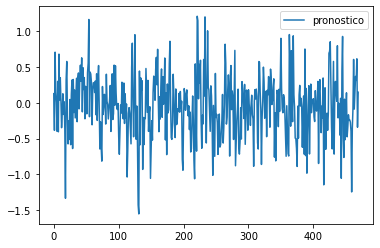

In [30]:
parcial = sc.inverse_transform(parcial)
print(parcial)
prediccion1SemanaDiciembre = pd.DataFrame(parcial)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico_X.csv')


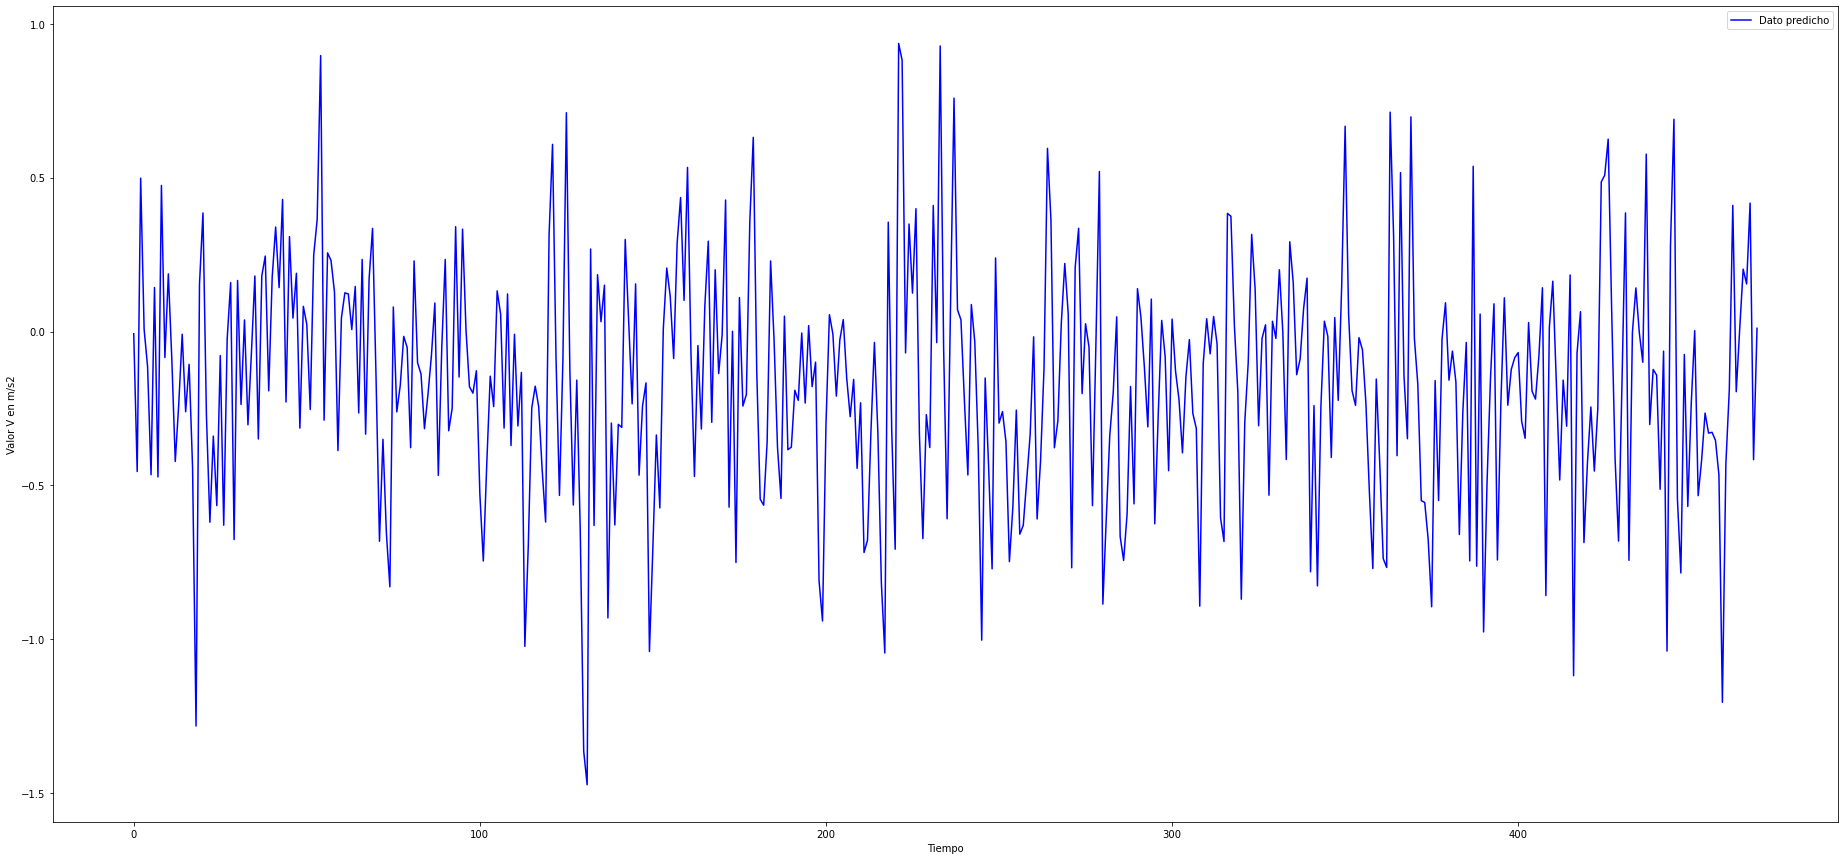

In [29]:
#graficar_resultado(set_validacion_sensor.values,parcial)
gra.mostrar(results)